In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_5.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [4]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_5") 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_5") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [5]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    0.6s remaining:    8.6s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    2.7s remaining:   18.0s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    8.5s remaining:   35.4s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   10.6s remaining:   30.4s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   12.3s remaining:   25.9s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   12.5s remaining:   19.8s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   12.7s remaining:   15.4s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   12.8s remaining:   12.0s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   12.8s remaining:    9.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   12.9s remaining:    7.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   12.9s remaining:    5.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 553 ms, sys: 383 ms, total: 936 ms
Wall time: 13.4 s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:   13.0s finished


In [6]:
qr_mc.df.index.size

471347

In [7]:
dfmc     = qr_mc.getDF()

In [9]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']
mvas = [ ("newPhoID",[]), ("newPhoIDcorrShowerShapes",showerShapes),  ("newPhoIDcorrIso",'PhoIso03'), 
         ("newPhoIDcorr",showerShapes+['PhoIso03']) ] 

weights = ("./phoIDMVAweights/MVAweights_80X_barrel_ICHEPvtx.xml","./phoIDMVAweights/MVAweights_80X_endcap_ICHEPvtx.xml")

In [10]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    9.3s remaining:  2.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   10.1s remaining:  1.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   12.5s remaining:   51.9s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   13.2s remaining:   38.1s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   13.8s remaining:   28.9s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   14.1s remaining:   22.3s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   14.1s remaining:   17.2s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   14.5s remaining:   13.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   14.6s remaining:   10.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   14.6s remaining:    8.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   14.7s remaining:    6.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 939 ms, sys: 613 ms, total: 1.55 s
Wall time: 18 s
Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    9.7s remaining:  2.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   10.0s remaining:  1.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   10.1s remaining:   42.0s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   10.2s remaining:   29.4s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   10.3s remaining:   21.6s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   10.9s remaining:   17.2s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   11.2s remaining:   13.7s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   11.3s remaining:   10.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   11.4s remaining:    8.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   11.5s remaining:    6.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   11.5s remaining:    4.7s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorrShowerShapes, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:   12.5s finished
[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    3.2s remaining:   46.9s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    7.4s remaining:   50.0s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    8.5s remaining:   35.2s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    8.6s remaining:   24.7s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    8.6s remaining:   18.1s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    8.7s remaining:   13.8s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    8.7s remaining:   10.6s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    8.7s remaining:    8.2s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    8.8s remaining:    6.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    8.8s remaining:    4.9s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    

Computing newPhoIDcorrIso, correcting PhoIso03


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    3.3s remaining:   47.7s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    5.0s remaining:   33.6s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    6.1s remaining:   25.4s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    6.9s remaining:   19.8s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    7.2s remaining:   15.2s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    7.3s remaining:   11.6s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    7.6s remaining:    9.2s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    7.6s remaining:    7.1s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    7.6s remaining:    5.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    7.7s remaining:    4.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    7.7s remaining:    3.1s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorr, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'PhoIso03']


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    5.6s remaining:  1.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    7.5s remaining:   50.7s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    8.1s remaining:   33.6s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    8.3s remaining:   23.8s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    8.7s remaining:   18.2s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    8.8s remaining:   13.9s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    9.0s remaining:   10.9s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    9.1s remaining:    8.5s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    9.3s remaining:    6.7s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    9.4s remaining:    5.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    9.4s remaining:    3.9s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.93 s, sys: 1.8 s, total: 3.74 s
Wall time: 43.3 s


In [11]:
dfmc['idCorr'] = dfmc['newPhoID'] - dfmc['newPhoIDcorr']
dfmc['idCorrIso'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrIso']
dfmc['idCorrShowerShapes'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrShowerShapes']
dfmc['absScEta'] = np.abs(dfmc['ScEta'])


In [12]:
dfmcEB   = dfmc  .query('-1.444 < ScEta and ScEta <1.444') 
dfmcEE   = dfmc  .query('ScEta < -1.57 or ScEta >1.57  ') 

In [13]:
dfEB   = dfdata  .query('-1.444 < ScEta & ScEta <1.444') 
dfEE   = dfdata  .query('ScEta < -1.57 | ScEta >1.57  ') 

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


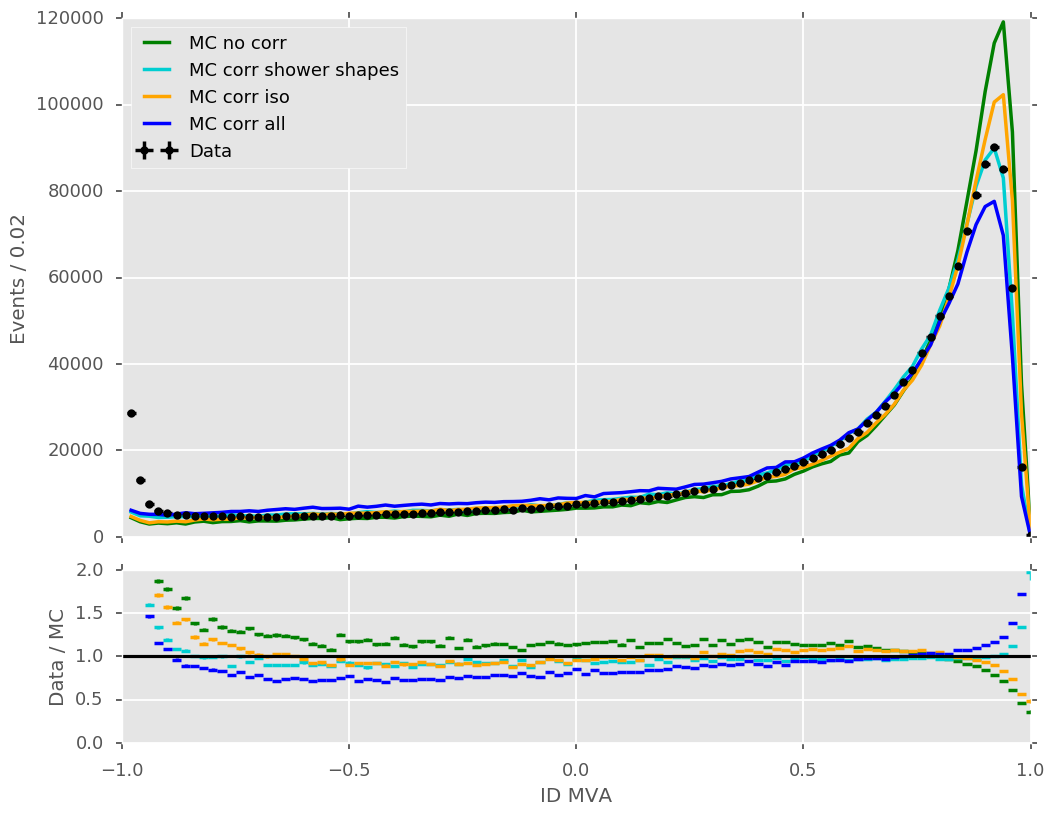

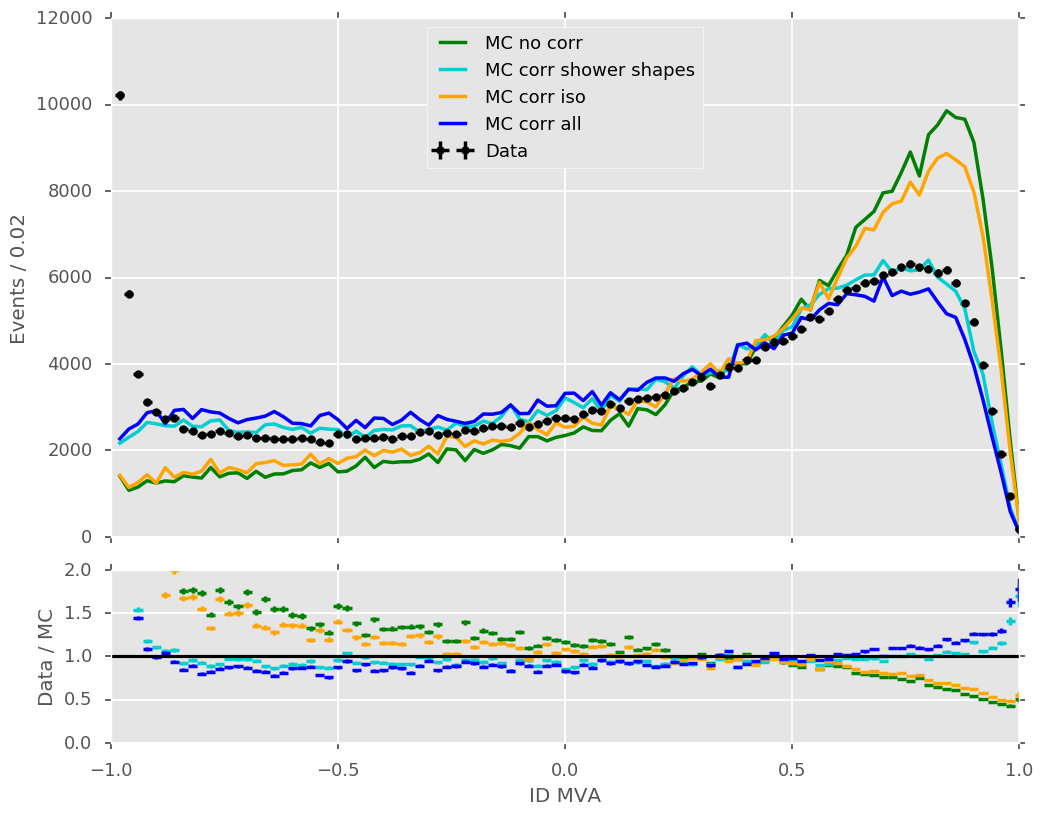

In [14]:
bins = np.linspace(-1,1,101)
var = 'newPhoID'
mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))
